## Nipun Mohindra, D20019 
## PGPDS July 2020 (Bangalore batch) 

### Time series forecasting

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

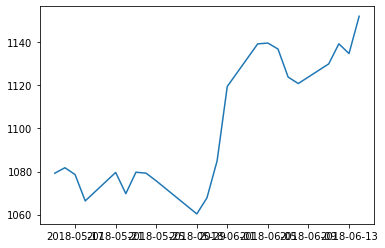

In [2]:
stock = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\GOOG.csv', header=None, delimiter=',')
stock.columns = ['date','price']
stock['date'] = pd.to_datetime(stock['date'], format='%d-%m-%Y')
indexed_stock = stock.set_index('date')
ts = indexed_stock['price']
plt.plot(ts)
plt.show()

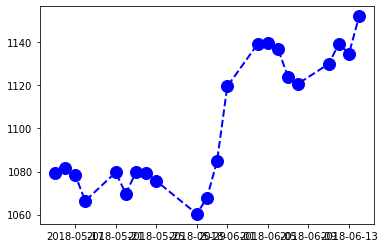

In [3]:
plt.plot(ts, 'bo--', linewidth=2, markersize=12)
plt.show()

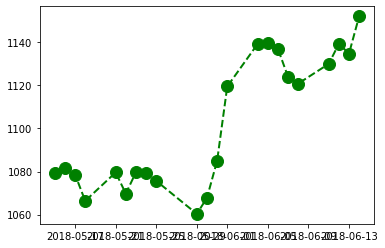

In [4]:
# another way
plt.plot(ts, color='green', marker='o', linestyle='dashed',      linewidth=2, markersize=12)

[]

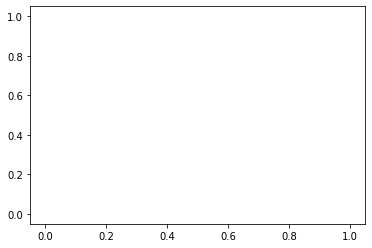

In [5]:
plt.plot(data=ts, subplots=True)

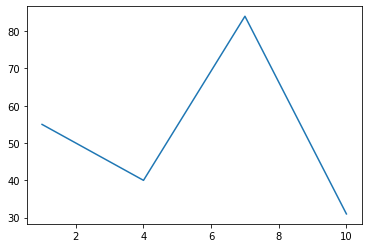

In [6]:
df = pd.DataFrame({'month': [1, 4, 7, 10], 'sale': [55, 40, 84, 31]})
plt.plot('month','sale', data=df)

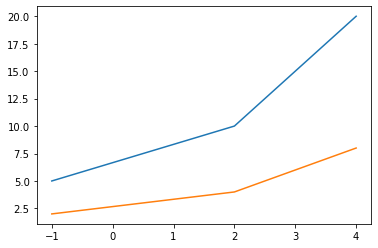

In [7]:
# multiple lines in a plot
df = pd.DataFrame({'x': [-1,2,3,4], 'y': [5,10,15,20],'z': [2,4,6,8]})
plt.plot(df.x,df[['y','z']]) # df.x is x and 2D passed on becomes values on y axis


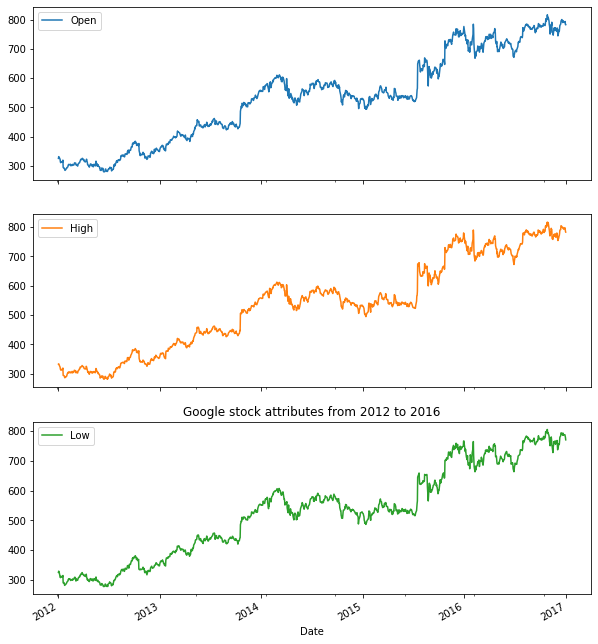

In [9]:
# common axis plot
google = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\Google_Stock_Price_Train.csv',index_col='Date', parse_dates=['Date'])
google.head()
google.tail()
google['2012':'2016'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2012 to 2016')
plt.show()


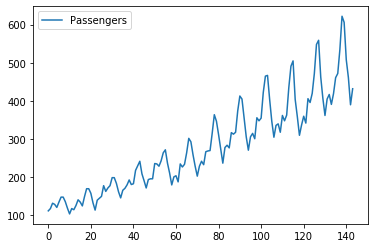

In [10]:
from statsmodels.graphics.tsaplots import month_plot
AirPassengers = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\airline_passengers.csv')
AirPassengers.plot()
# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(AirPassengers['Month'])

In [11]:
datetime_index = pd.DatetimeIndex(datetime_series.values)

In [12]:
df2=AirPassengers[['Passengers']].set_index(datetime_index)

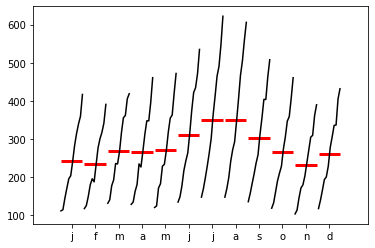

In [13]:
month_plot(df2['Passengers'])
plt.show()

In [14]:
df = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\airline_passengers.csv', parse_dates=['Month'])
x = df['Month'].values
y1 = df['Passengers'].values

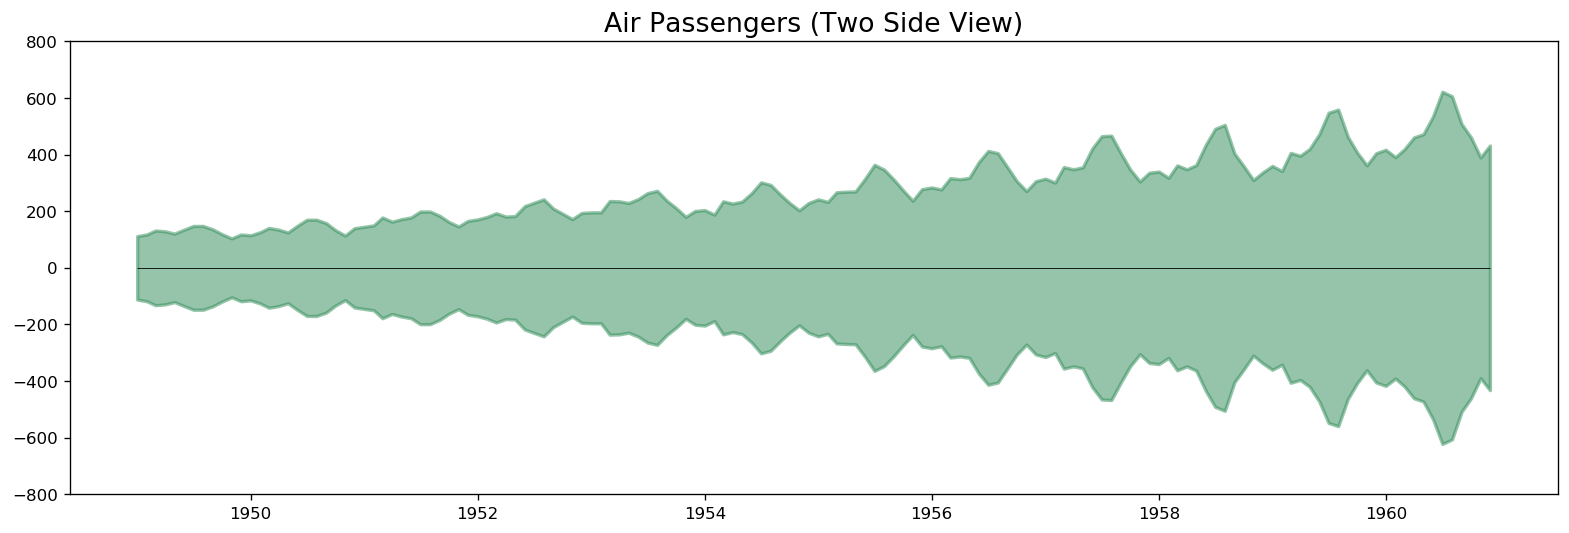

In [15]:
import numpy as np
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=.5)
plt.show()

In [16]:
from pandas import DataFrame
from pandas import Grouper

In [17]:
series = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\daily_min_temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


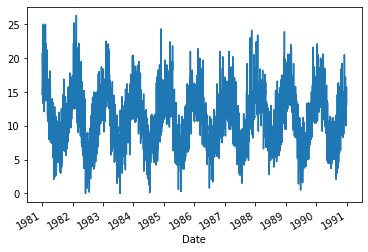

In [18]:
# line plot
series.plot()
plt.show()

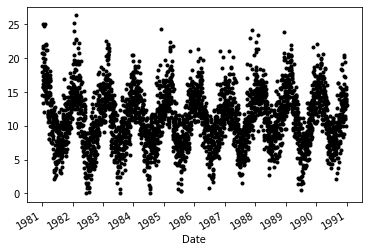

In [19]:
# Or scatter plot
series.plot(style='k.')
plt.show()

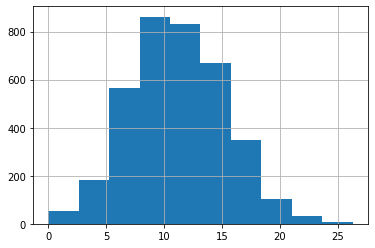

In [20]:
# histogram
series.hist()
plt.show()

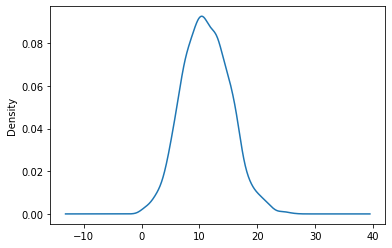

In [21]:
# density plot
series.plot(kind='kde')
plt.show()

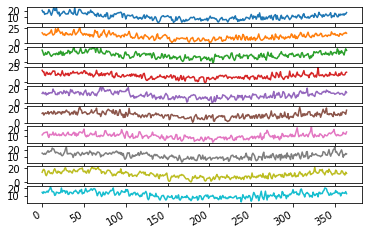

In [22]:
# seasonal plots
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

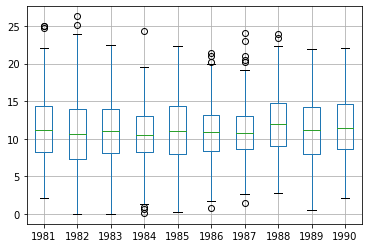

In [23]:
# boxplot by year
years.boxplot()
plt.show()

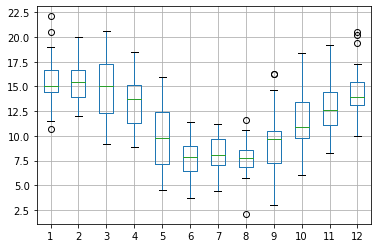

In [24]:
# create a boxplot of monthly data
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.show()

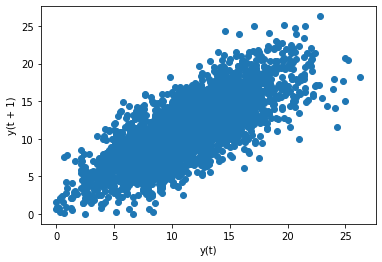

In [25]:
# lag plot
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

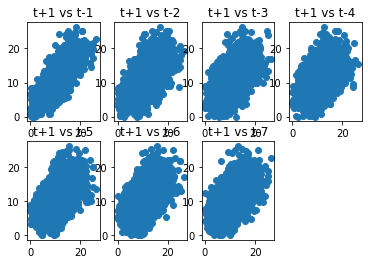

In [26]:
# plot against more lags
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

In [27]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from statsmodels.tsa.seasonal import seasonal_decompose

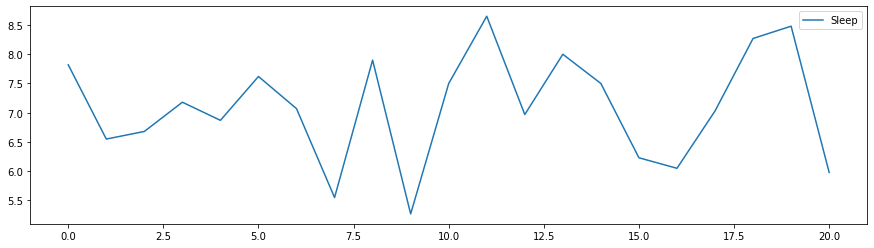

In [30]:
# demo1: sleep dataset. Has level, no trend and fluctuates about the level
plt.rcParams['figure.figsize'] = [15, 4]
ts = pd.read_csv(r"D:\Stu\PGP Data Science\Term 2\TF\sleepDuration.csv")
ts.plot()
plt.show()

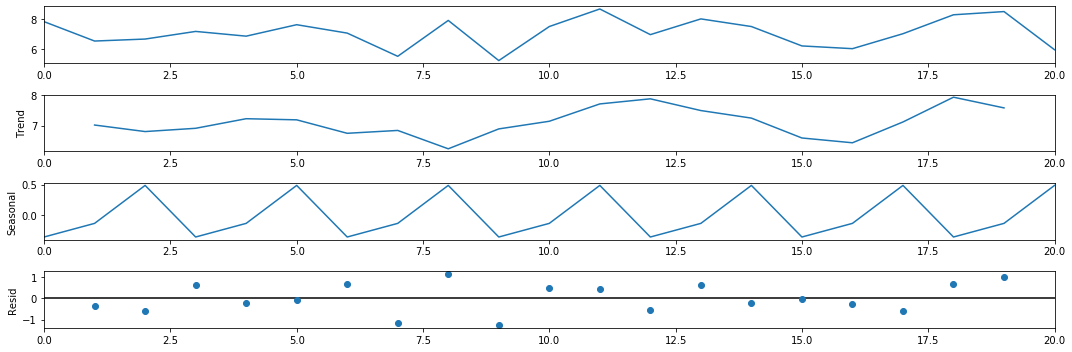

In [31]:
# decompose and plot components
plt.rcParams['figure.figsize'] = [15, 5]
ts_components = seasonal_decompose(ts, model='additive', period=3)
ts_components.plot()
plt.show()

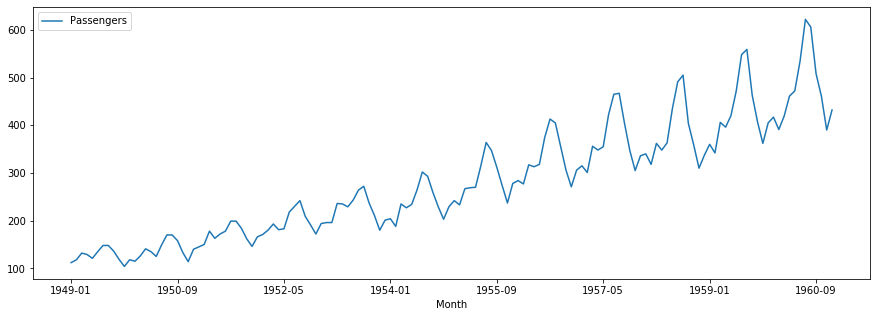

In [33]:
# demo2: air passengers dataset, has clear trend and multiplicative seasonality
ts = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\airline_passengers.csv', header=0, index_col=0)
ts.plot()
plt.show()

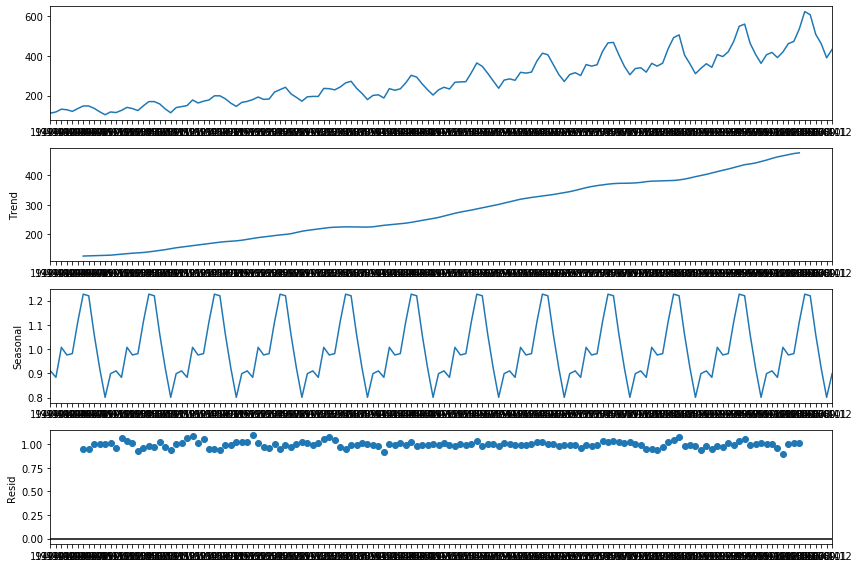

In [34]:
plt.rcParams['figure.figsize']  = [12, 8]
ts_components = seasonal_decompose(ts, model='multiplicative',period=12)
ts_components.plot()
plt.show()

### Simple Exponential Smoothing

In [35]:
#import relevant libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [36]:
#read the dataset
data=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\seriesdat.csv')

In [37]:
data

,t,y
0,1,3
1,2,5
2,3,9
3,4,20
4,5,12
5,6,17
6,7,22
7,8,23
8,9,51
9,10,41


In [38]:
# split as train the first 10 entries and rest as test
train = data.iloc[0:10]
test = data.iloc[10:]
y_hat = test.copy()


In [39]:
# fit a SES without specifying smooth parameter, so library does it for us
fitx = SimpleExpSmoothing(np.asarray(train['y'])).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])


C:\Users\Nipun\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


optimal alpha chosen: 0.7893451404406692


In [40]:
# fit a SES with explicitly supplied smooth parameter
fit2 = SimpleExpSmoothing(np.asarray(train['y'])).fit(smoothing_level=0.4, optimized=False)

In [41]:
fit2

In [42]:
# print the rmse of training step
rms_train_opt = sqrt(mean_squared_error(train['y'], fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)
rms_train = sqrt(mean_squared_error(train['y'], fit2.fittedvalues)) 
print('rmse for fitted values with supplied alpha: ', rms_train)

rmse for fitted values with optimal alpha:  10.370473454369481
rmse for fitted values with supplied alpha:  11.97758663406276


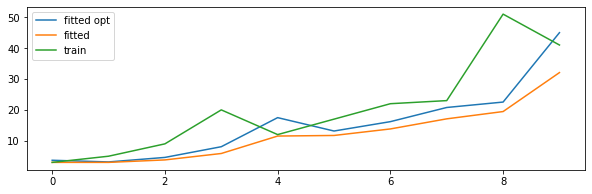

In [43]:
# plot training data against fitted values using both models
plt.figure(figsize=(10,3))
plt.plot(fitx.fittedvalues, label = 'fitted opt')
plt.plot(fit2.fittedvalues, label = 'fitted')
plt.plot(train['y'], label='train')
plt.legend(loc='best')
plt.show()

In [44]:
# forecast using both models
y_hat['SES_opt_fcast'] = fitx.forecast(len(y_hat))
y_hat['SES_fcast'] = fit2.forecast(len(y_hat))


In [45]:
# display forecasted values
y_hat

,t,y,SES_opt_fcast,SES_fcast
10,11,56,41.843247,35.645178
11,12,75,41.843247,35.645178
12,13,60,41.843247,35.645178
13,14,75,41.843247,35.645178
14,15,88,41.843247,35.645178


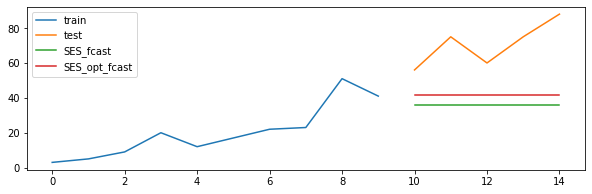

In [46]:
# plot the time series as train, test and forecasted
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['SES_fcast'], label='SES_fcast')
plt.plot(y_hat['SES_opt_fcast'], label='SES_opt_fcast')
plt.legend(loc='best')
plt.show()

In [47]:
# calculate RMSE of the forecast on test data
rms = sqrt(mean_squared_error(test.y, y_hat.SES_fcast)) 
print('rmse for model with supplied alpha: ', rms)
rms_opt = sqrt(mean_squared_error(test.y, y_hat.SES_opt_fcast)) 
print('rmse for model with optimal alpha: ', rms_opt)

rmse for model with supplied alpha:  37.00299290567906
rmse for model with optimal alpha:  31.174565582995854


### Double Exponential Smoothing

In [2]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [6]:
series=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\seriesdat.csv')

In [7]:
series

,t,y
0,1,3
1,2,5
2,3,9
3,4,20
4,5,12
5,6,17
6,7,22
7,8,23
8,9,51
9,10,41


In [8]:
train = series.iloc[0:10]
test = series.iloc[10:]

In [9]:

# using Holt's linear model predict for test set
y_hat = test.copy()
fit = Holt(np.asanyarray(train['y'])).fit(smoothing_level=0.4, smoothing_slope=0.7, optimized=False)
y_hat['Holt_linear'] = fit.forecast(len(test))
y_hat

,t,y,Holt_linear
10,11,56,51.986649
11,12,75,60.201958
12,13,60,68.417266
13,14,75,76.632575
14,15,88,84.847884


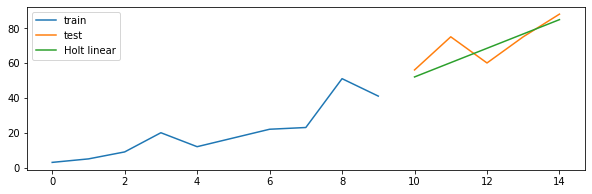

In [10]:
# plot the forecast
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()

In [11]:
# compute the error
rmse=sqrt(mean_squared_error(test.y, y_hat['Holt_linear']))
print(rmse)

7.981736109419356


In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']), trend='add', seasonal=None)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.7, optimized=False)
y_hat['DES'] = fit1.forecast(len(test))
y_hat

,t,y,Holt_linear,DES
10,11,56,51.986649,51.986649
11,12,75,60.201958,60.201958
12,13,60,68.417266,68.417266
13,14,75,76.632575,76.632575
14,15,88,84.847884,84.847884


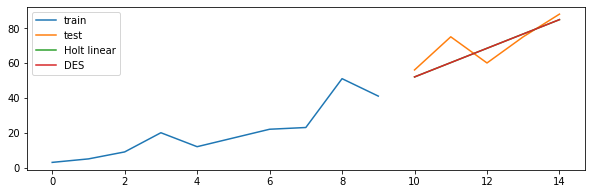

In [13]:
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.plot(y_hat['DES'], label='DES')
plt.legend(loc='best')
plt.show()

In [14]:
rmse=sqrt(mean_squared_error(test.y, y_hat['DES']))
print(rmse)

7.981736109419356


C:\Users\Nipun\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


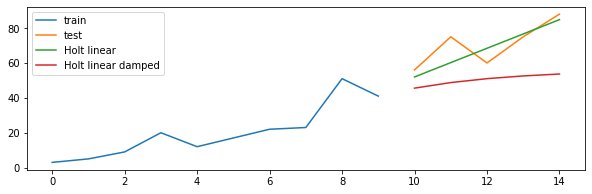

In [15]:
# damped trend (optional)
fit = Holt(np.asanyarray(train['y']), damped=True).fit(smoothing_level=0.4, smoothing_slope=0.7, damping_slope=0.7)
y_hat['Holt_linear_damped'] = fit.forecast(len(test))
y_hat
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.plot(y_hat['Holt_linear_damped'], label='Holt linear damped')
plt.legend(loc='best')
plt.show()

In [16]:
rmse=sqrt(mean_squared_error(test.y, y_hat['Holt_linear_damped']))
print(rmse)

22.62959599195925


### Triple Exponential Smoothing

In [86]:
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [87]:
new=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\seriesseasonal.csv')
new.head()

,qtr,t,y
0,10 Q1,1,10
1,10 Q2,2,14
2,10 Q3,3,8
3,10 Q4,4,25
4,11 Q1,5,16


In [88]:
train = new.iloc[0:10]
test = new.iloc[10:]
y_hat = test.copy()

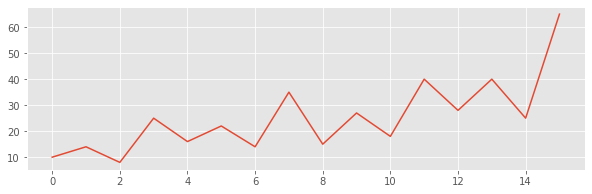

In [89]:
plt.figure(figsize=(10,3))
plt.plot(new['y'], label='new')
plt.show()

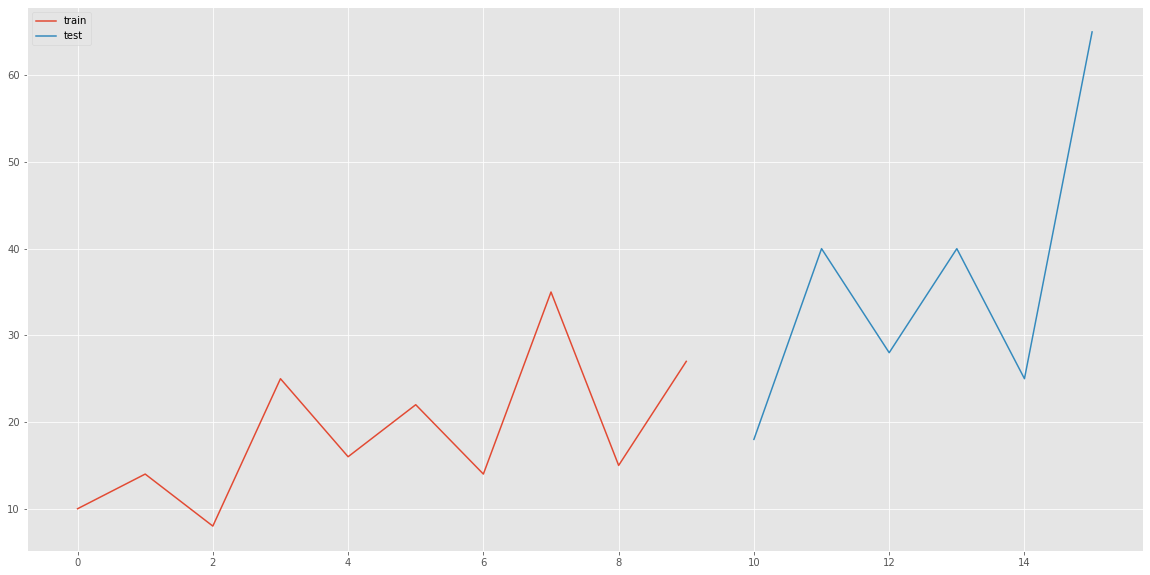

In [90]:
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.legend(loc='best')
plt.show()

In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='mul')
fit1 = model.fit(smoothing_level=0.0426, smoothing_slope=0.355, smoothing_seasonal=0.161, optimized=False)
y_hat['TES_add_mul'] = fit1.forecast(len(test))
y_hat


,qtr,t,y,TES_add_mul
10,12 Q3,11,18,16.900865
11,12 Q4,12,40,52.601413
12,13 Q1,13,28,22.792009
13,13 Q2,14,40,33.721065
14,13 Q3,15,25,19.987626
15,13 Q4,16,65,61.788988


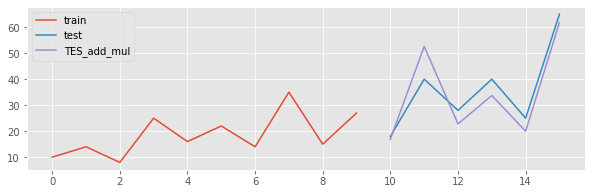

In [92]:
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['TES_add_mul'], label='TES_add_mul')
plt.legend(loc='best')
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add_mul']))
print(rmse)

6.607904216572736


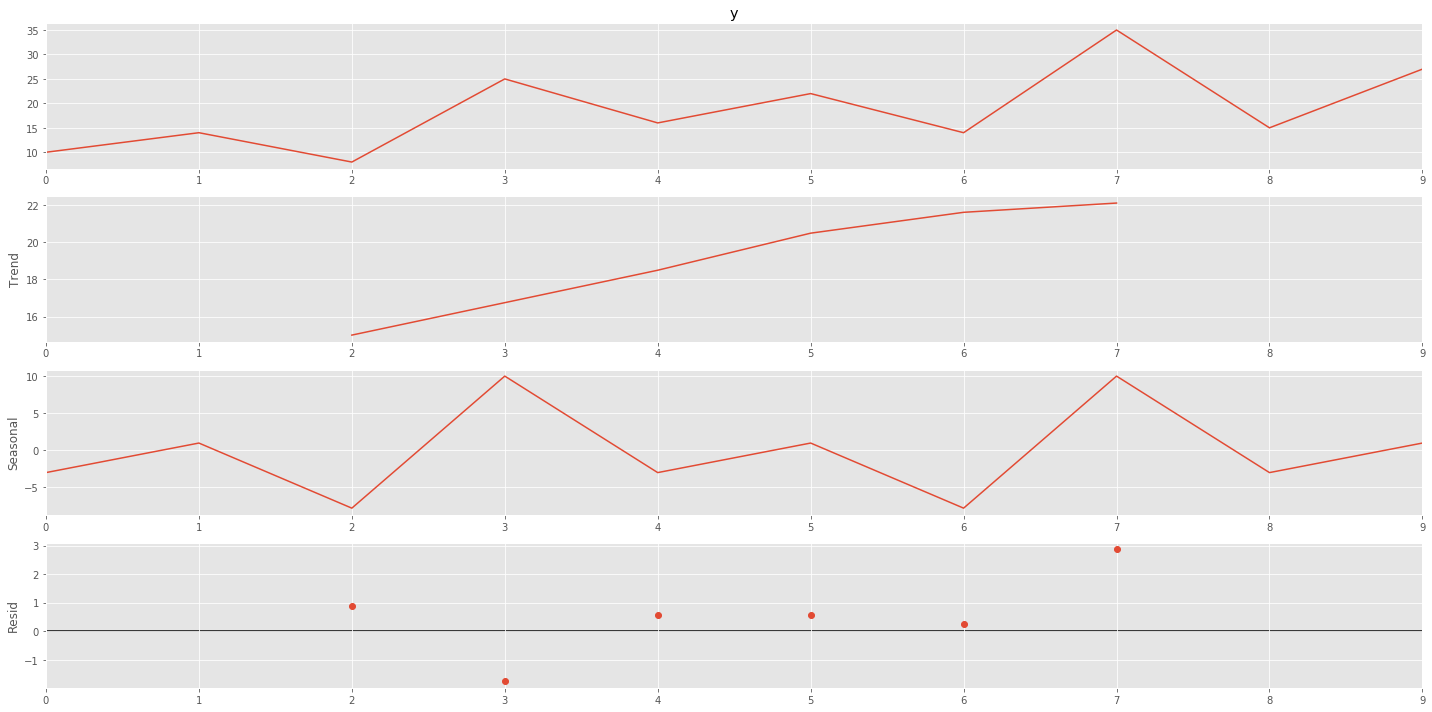

In [94]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.y, model='add', period=4).plot()
#result = sm.tsa.stattools.adfuller(Train.count)
plt.show()

In [95]:
# additive model
# corresponds to real-statistics worksheet "Holt Winters 5"
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='add')
fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)
y_hat['TES_add'] = fit1.forecast(len(test))
y_hat
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add']))
print(rmse)


8.339781739486002


In [96]:
model.initial_values()
fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False, initial_level=14.25, initial_slope=1.875)


In [97]:
model.initial_values()

(14.25, 1.875, [-4.25, -0.25, -6.25, 10.75])

In [98]:
import numpy as np
from pandas import read_csv
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
from sklearn.metrics import mean_squared_error 
from math import sqrt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [100]:
raw=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\seriesseasonal.csv')
raw.head()

,qtr,t,y
0,10 Q1,1,10
1,10 Q2,2,14
2,10 Q3,3,8
3,10 Q4,4,25
4,11 Q1,5,16


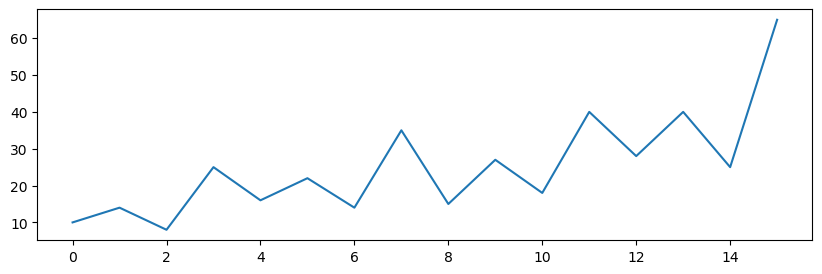

In [101]:
# plot the full series
plt.figure(figsize=(10,3))
plt.plot(raw['y'], label='raw')
plt.show()

In [102]:
# Using ExponentialSmoothing
# this is based on Real Statistics worksheet "Holt-Winters"

# we are building a model [L + T]* S template and passing 4 as length of season cycle
model = ExponentialSmoothing(np.asarray(raw['y']), seasonal_periods=4, trend='add', seasonal='mul')

In [103]:
# fit a model giving these inputs. the strange numbers are a result of optimization.
fit1 = model.fit(smoothing_level=0.2, smoothing_slope=0.2, smoothing_seasonal=0.2, optimized=False)

In [104]:
# how to get info about the model, fitted values
fit1.sse # SSE on training data
fit1.level # level values fitted
fit1.slope # trend values fitted
fit1.season # season value fitted
fit1.fittedvalues # fitted values
fit1.fcastvalues # one time step ahead forecast
fit1.fittedfcast # fitted and one time step ahead forecast
fit1.summary() # model parameters, e.g. alpha, beta etc used or optim values

Dep. Variable:,endog,No. Observations:,16
Model:,ExponentialSmoothing,SSE,329.283
Optimized:,False,AIC,64.389
Trend:,Additive,BIC,70.570
Seasonal:,Multiplicative,AICC,108.389
Seasonal Periods:,4,Date:,"Thu, 04 Feb 2021"
Box-Cox:,False,Time:,20:16:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_slope,0.2000000,beta,False


In [105]:
# let us reconcile the SSE output.
# this calculates RMSE comparing original data against fitted values
rmse=sqrt(mean_squared_error(raw['y'], fit1.fittedvalues))
print(rmse)
# to compare with SSE, first we need to divide by 16 and take sqrt
np.sqrt(1/16 * fit1.sse)

4.536541477616766


4.536541477616766

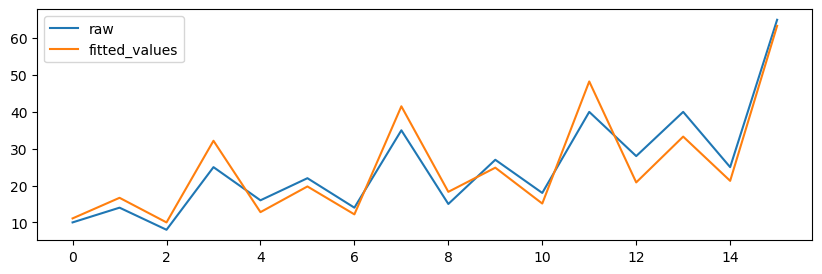

In [106]:
# lets see how the original data and fitted values are visually
plt.figure(figsize=(10,3))
plt.plot(raw['y'], label='raw')
plt.plot(fit1.fittedvalues, label='fitted_values')
plt.legend(loc='best')
plt.show()

In [107]:
# let us try splitting as train and test and try to forecast the test time periods

# split data training and test, create a dataframe with copy of test
train = raw.iloc[0:5]
test = raw.iloc[5:]
y_hat =test.copy() # copy to a dataframe so we can add columns later on

In [108]:
# fit model on just training data
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='mul')
fit1 = model.fit(smoothing_level=0.2, smoothing_slope=0.2, smoothing_seasonal=0.2, optimized=False)

In [109]:
# forecast for as many time periods as in test data
y_hat['TES_add_mul'] = fit1.forecast(len(test))

In [110]:
y_hat

,qtr,t,y,TES_add_mul
5,11 Q2,6,22,17.185955
6,11 Q3,7,14,10.135578
7,11 Q4,8,35,32.692075
8,12 Q1,9,15,13.643492
9,12 Q2,10,27,19.619432
10,12 Q3,11,18,11.521677
11,12 Q4,12,40,37.015106
12,13 Q1,13,28,15.389903
13,13 Q2,14,40,22.052909
14,13 Q3,15,25,12.907776


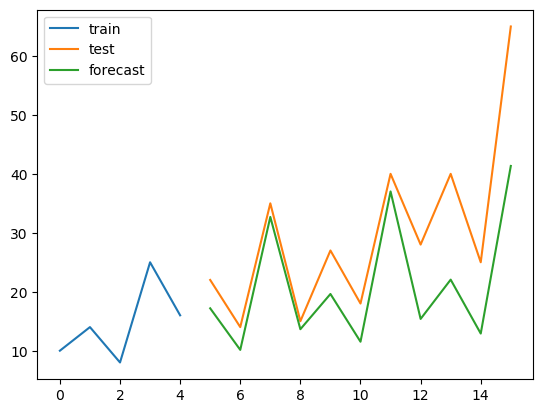

In [111]:
# plot the splits as train, test and forecasted values
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['TES_add_mul'], label='forecast')
plt.legend(loc='best')
plt.show()

In [112]:
# how well did the model perform against test?
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add_mul']))
print(rmse)

11.028247840258535


In [113]:
# optimized version
# this combination is probably the best for reducing MSE
fitx = model.fit(smoothing_level=0.0426, smoothing_slope=0.355, smoothing_seasonal=0.161, optimized=False, initial_level=14.25, initial_slope=1.875, use_brute=False)
y_hat['TES_fitx'] = fitx.forecast(len(test))
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_fitx']))
print(rmse)
fitx.fittedvalues
fitx.forecast(len(test))
fitx.summary()

6.424943413800467


Dep. Variable:,endog,No. Observations:,5
Model:,ExponentialSmoothing,SSE,164.559
Optimized:,False,AIC,33.469
Trend:,Additive,BIC,30.345
Seasonal:,Multiplicative,AICC,inf
Seasonal Periods:,4,Date:,"Thu, 04 Feb 2021"
Box-Cox:,False,Time:,20:17:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0426000,alpha,False
smoothing_slope,0.3550000,beta,False


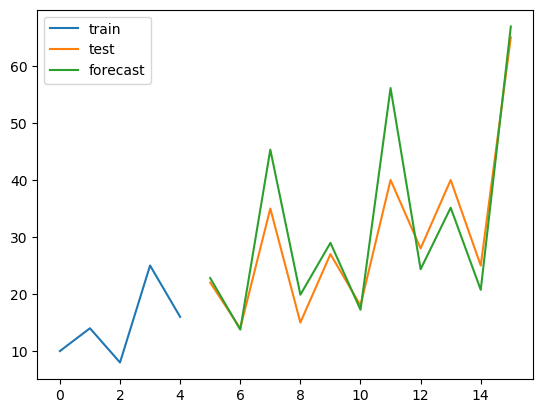

In [114]:
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['TES_fitx'], label='forecast')
plt.legend(loc='best')
plt.show()

In [115]:
# reconciling [L + T] * S
df = pd.DataFrame({'level':fit1.level, 'slope': fit1.slope, 'season':fit1.season,'fittedvalues':fit1.fittedvalues})
df

,level,slope,season,fittedvalues
0,13.350000,0.420000,0.764222,10.336538
1,13.616000,0.389200,1.064879,14.829231
2,13.804160,0.348992,0.606551,8.618585
3,13.922522,0.302866,1.891740,27.217600
4,15.567576,0.571304,0.836327,10.871352


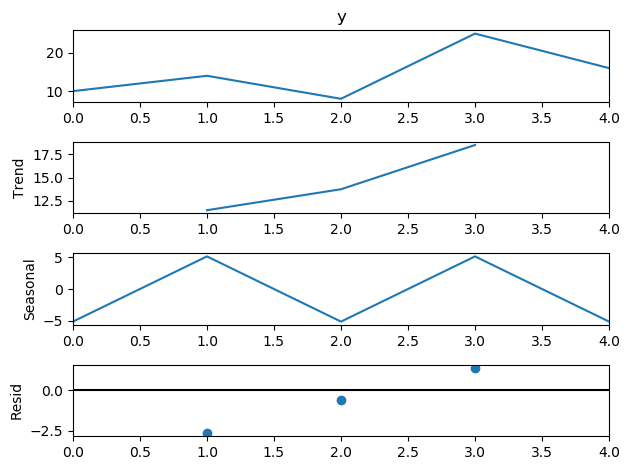

In [116]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.y, model='add', freq=2).plot()
#result = sm.tsa.stattools.adfuller(Train.count)
plt.show()

### ACF/PACF

In [17]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [18]:
df_stk=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\stock_price.csv')
df_stk.head()

,date,price
0,02-07-2005,196.03
1,02-08-2005,198.64
2,02-09-2005,191.58
3,02-10-2005,187.98
4,02-11-2005,187.40


In [19]:
y = df_stk['price']

In [20]:
acf(y,unbiased = True, nlags=2)
pacf(y,method='ols', nlags=10)

C:\Users\Nipun\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00,  1.00587089e+00, -7.32899725e-02, -2.05445922e-02,
       -4.33595753e-02, -8.79533812e-03, -4.74131771e-02,  9.90050703e-02,
        8.40046468e-02, -2.36080370e-02, -9.51872139e-05])

In [21]:
df_qk=pd.read_csv(r"D:\Stu\PGP Data Science\Term 2\TF\earthquakes.csv")
df_qk.head()

,Year,Quakes
0,1916,2
1,1917,5
2,1918,12
3,1919,8
4,1920,7


In [22]:
y = df_qk['Quakes']

In [23]:
acf(y,unbiased = True, nlags=2)
pacf(y,method='ols', nlags=10)

C:\Users\Nipun\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        ,  0.25497904,  0.12786317,  0.26928228,  0.09655141,
        0.09492763,  0.05341683,  0.07685978,  0.08519724, -0.15305453,
       -0.07642147])

In [24]:
def check_stationarity(y):    
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [25]:
y = df_stk['price']
check_stationarity(y)
y = df_qk['Quakes']
check_stationarity(y)

ADF Statistic: 0.568933
p-value: 0.986824
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582
ADF Statistic: -3.588541
p-value: 0.005984
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [26]:
df_stk['price_diff1'] = df_stk['price'] - df_stk['price'].shift(1)
df_stk.head()
check_stationarity(df_stk.price_diff1[1:])

ADF Statistic: -9.255725
p-value: 0.000000
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582


In [27]:
(acfs, acf_CI) = acf(y,unbiased = True, nlags = 2, alpha=0.05)
acf_CI
acfs

array([1.        , 0.25118307, 0.17465397])

### Autoregression

In [28]:
import warnings 
warnings.filterwarnings("ignore") 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [31]:
sales_data = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\retail_sales.csv')
sales_data['date']=pd.to_datetime(sales_data['date'])
sales_data.set_index('date', inplace=True)

In [32]:
sales_data.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


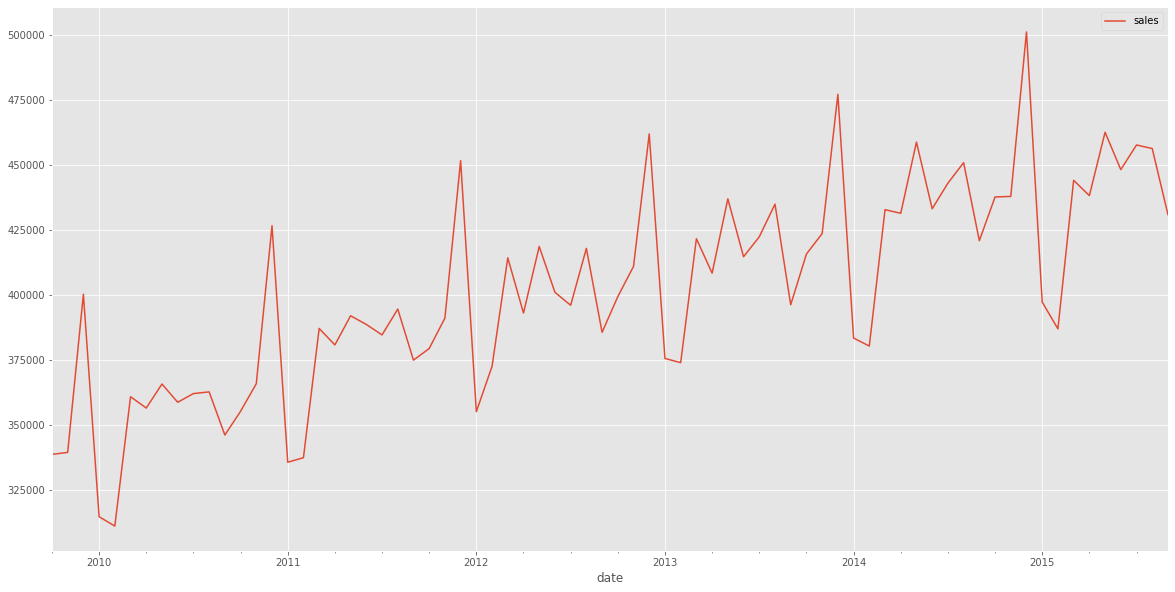

In [33]:
sales_data.plot()

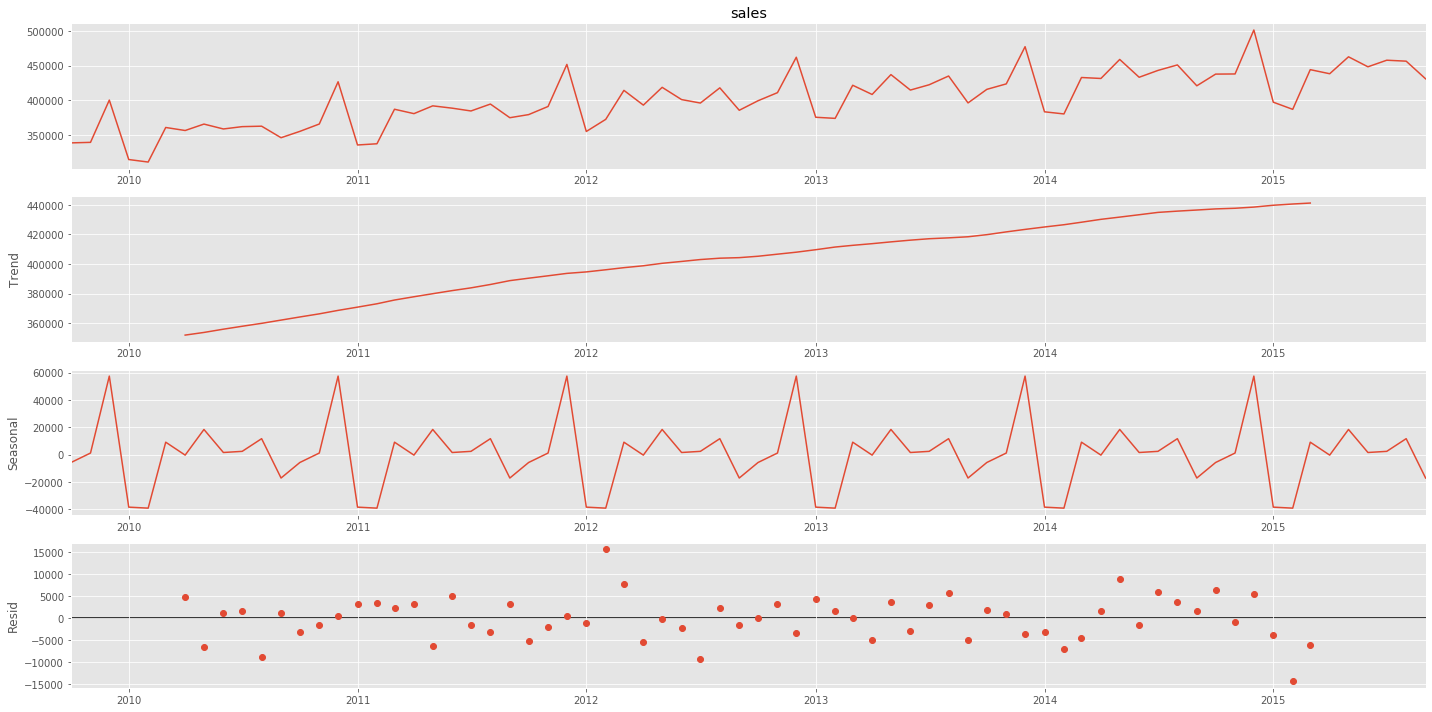

In [34]:
decomposed = seasonal_decompose(sales_data['sales'], model='additive')
x =decomposed.plot()

In [35]:
sales_data['stationary']=sales_data['sales'].diff()

In [36]:
sales_data.head()

,sales,stationary
date,,
2009-10-01,338630,NaN
2009-11-01,339386,756.0
2009-12-01,400264,60878.0
2010-01-01,314640,-85624.0
2010-02-01,311022,-3618.0


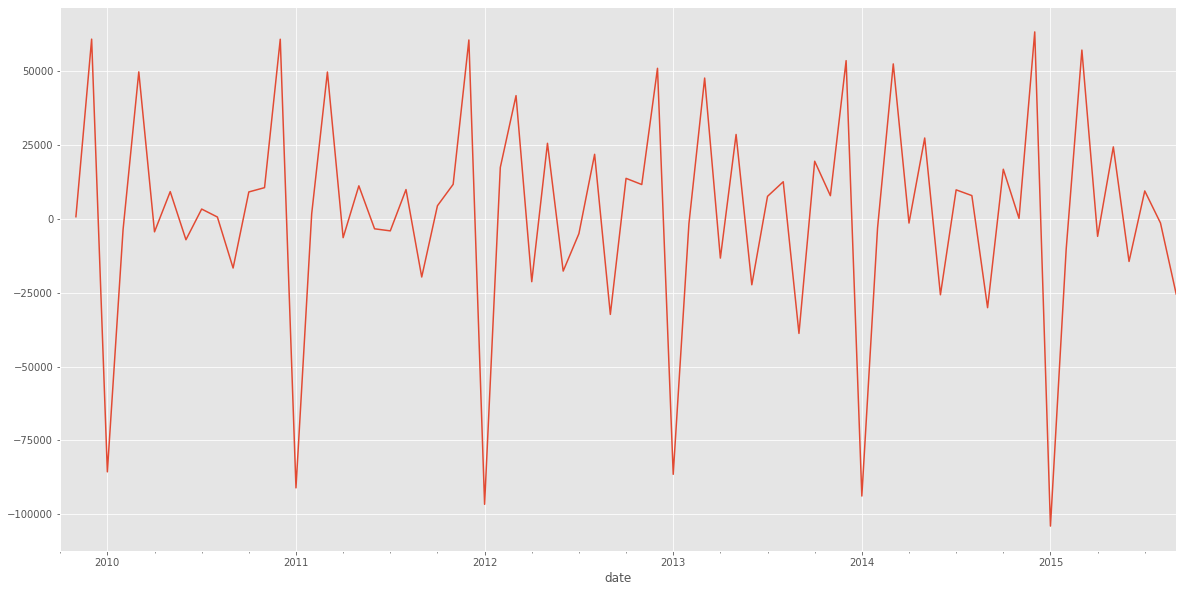

In [37]:
sales_data['stationary'].plot()

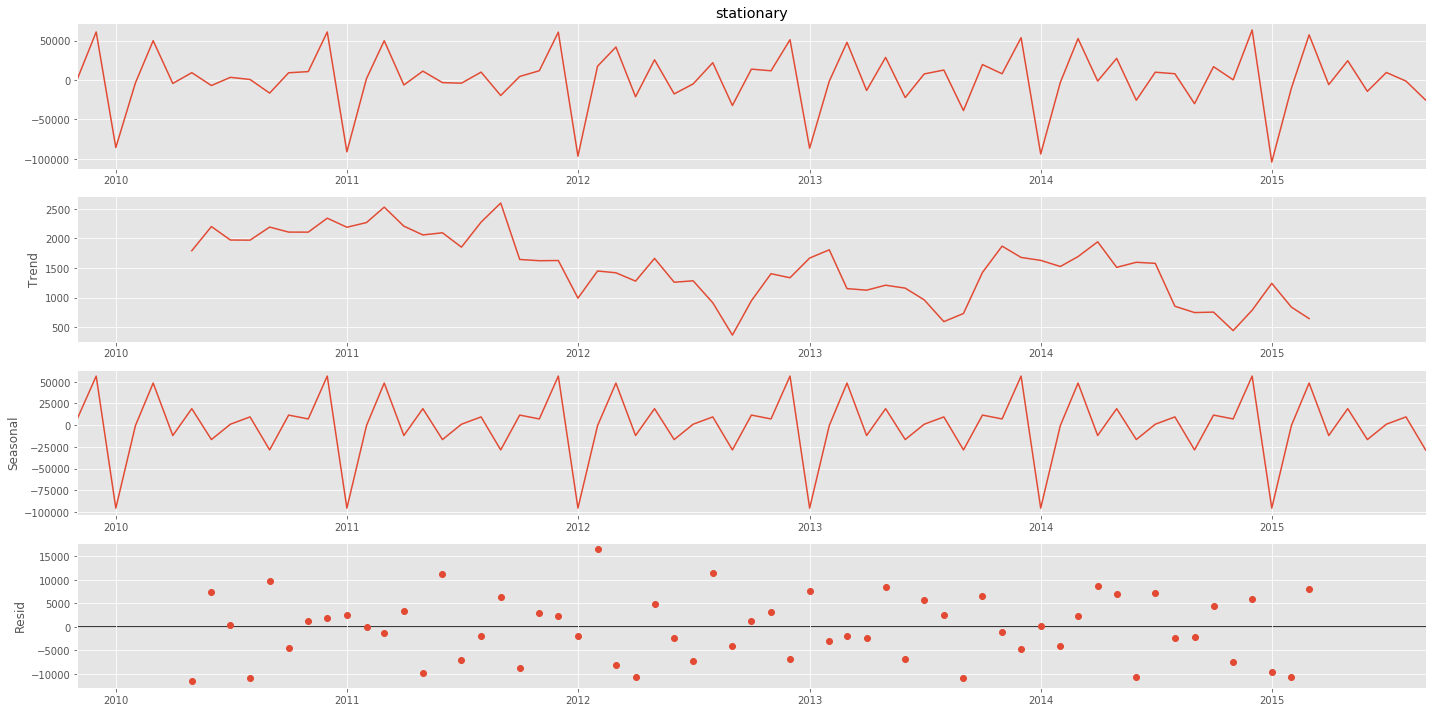

In [38]:
decomposed = seasonal_decompose(sales_data['stationary'].dropna(), model='additive')
x =decomposed.plot()

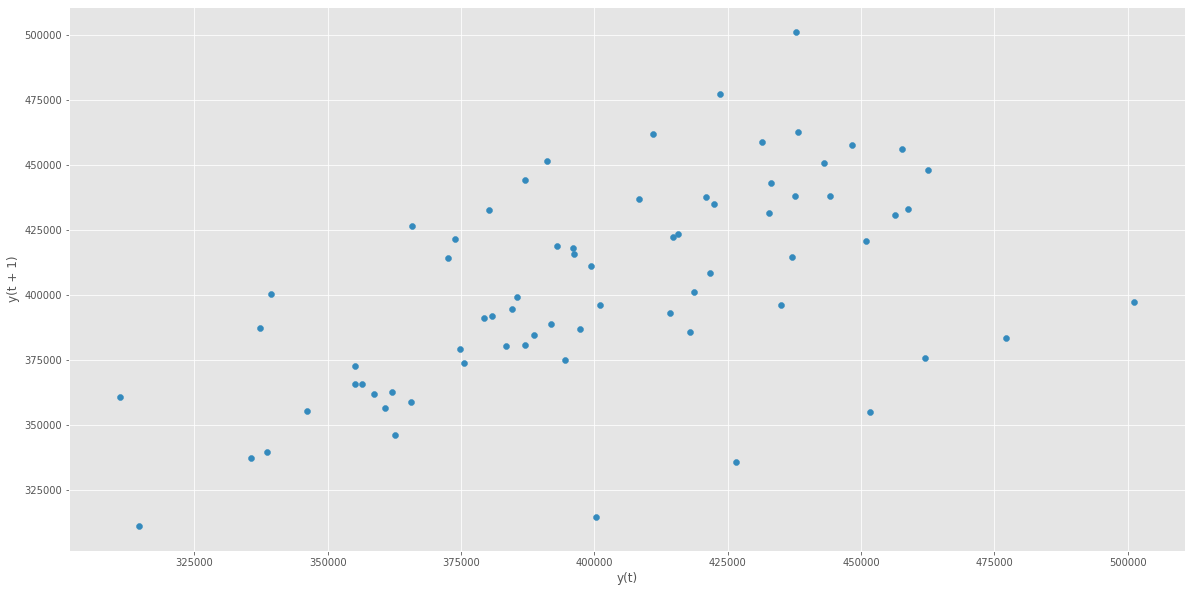

In [39]:
pd.plotting.lag_plot(sales_data['sales'])

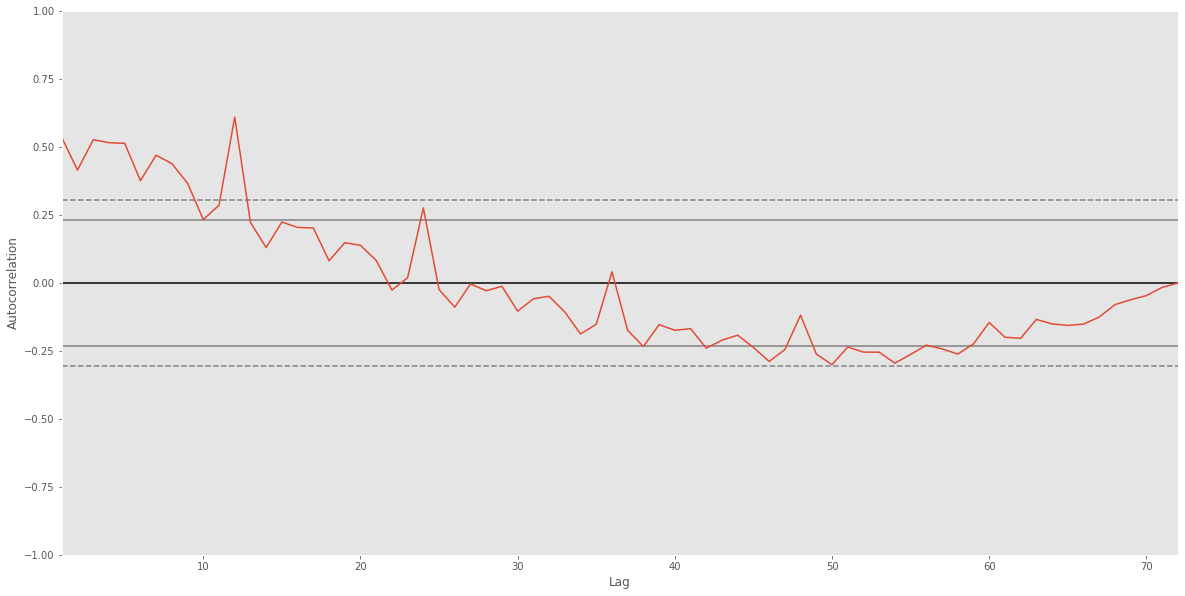

In [40]:
pd.plotting.autocorrelation_plot(sales_data['sales'])

In [41]:
sales_data['sales'].corr(sales_data['sales'].shift(12))

0.9790985975895788

In [42]:
X = sales_data['stationary'].dropna()

train_data = X[1:len(X)-12]
test_data = X[X[len(X)-12:]]

In [43]:
model = AR(train_data)
model_fitted = model.fit()

In [44]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 10


In [45]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const             7720.952626
L1.stationary       -1.297636
L2.stationary       -1.574980
L3.stationary       -1.403045
L4.stationary       -1.123204
L5.stationary       -0.472200
L6.stationary       -0.014586
L7.stationary        0.564099
L8.stationary        0.792080
L9.stationary        0.843242
L10.stationary       0.395546
dtype: float64


In [46]:
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

compare_df = pd.concat(
    [sales_data['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

In [47]:
compare_df

,actual,predicted
2014-10-01,16831.0,5601.811846
2014-11-01,208.0,38414.120561
2014-12-01,63322.0,35441.708285
2015-01-01,-103980.0,-49947.389001
2015-02-01,-10317.0,-21617.841678
2015-03-01,57175.0,20818.987209
2015-04-01,-5893.0,14274.367772
2015-05-01,24398.0,15474.495929
2015-06-01,-14386.0,-12799.912704
2015-07-01,9481.0,10743.906740


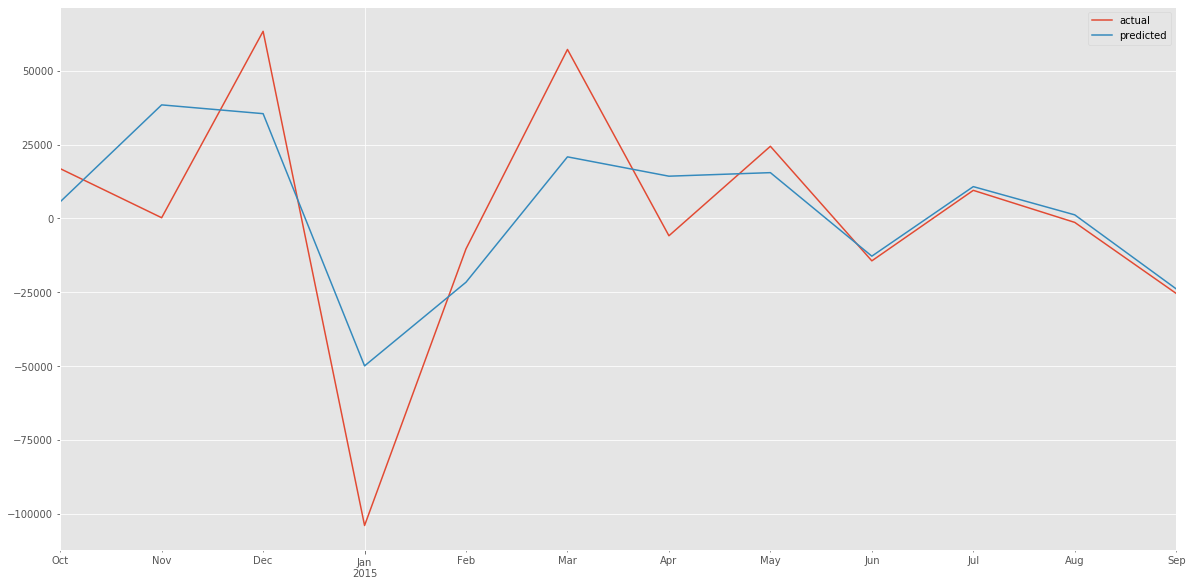

In [48]:
compare_df.plot()

In [49]:
r2 = r2_score(sales_data['stationary'].tail(12), predictions)

In [50]:
r2

0.6392721768478098

### ARIMA

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import arima


In [52]:
df = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\ebillMonthly4.csv', index_col='BilledMonth', parse_dates=['BilledMonth'])

In [53]:
df.head()
df.tail()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Jan-00 to Mar-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  195 non-null    float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [54]:
y = df['Amount']

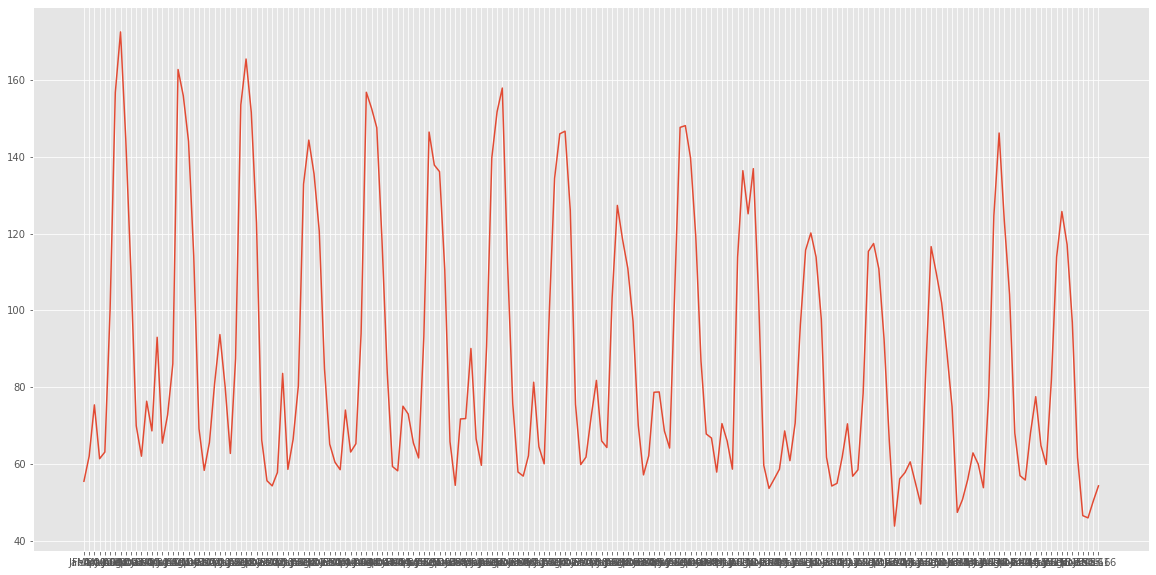

In [55]:
plt.plot(y)
plt.show()

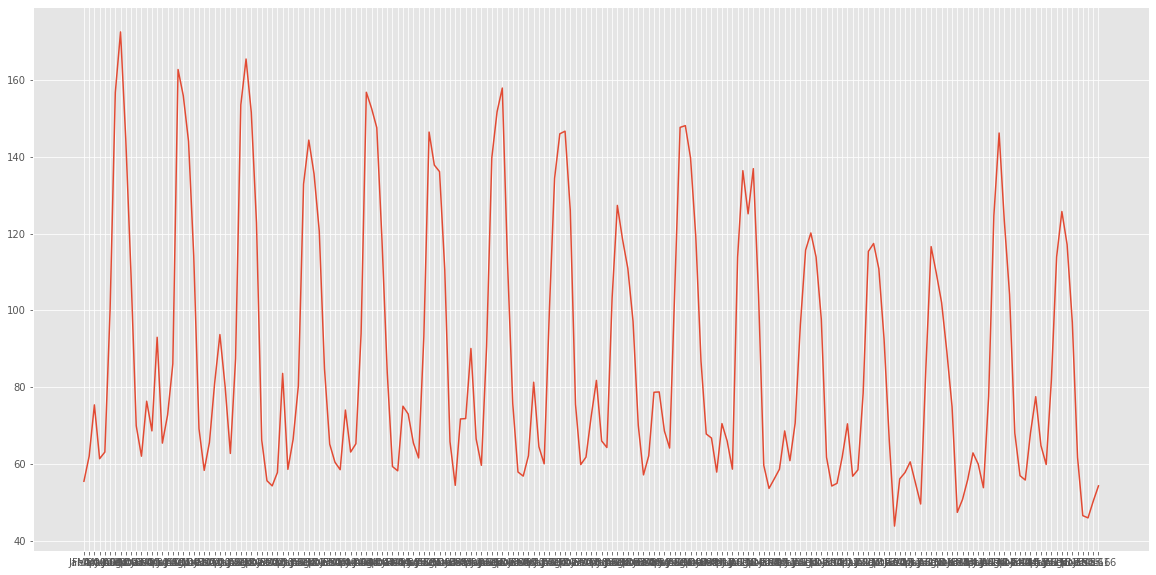

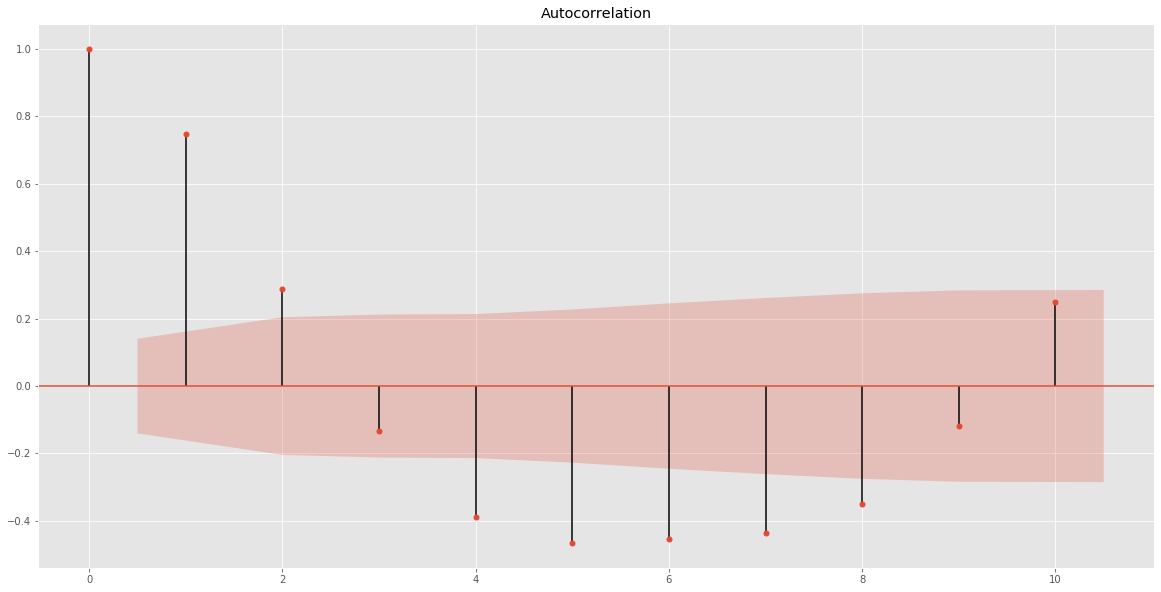

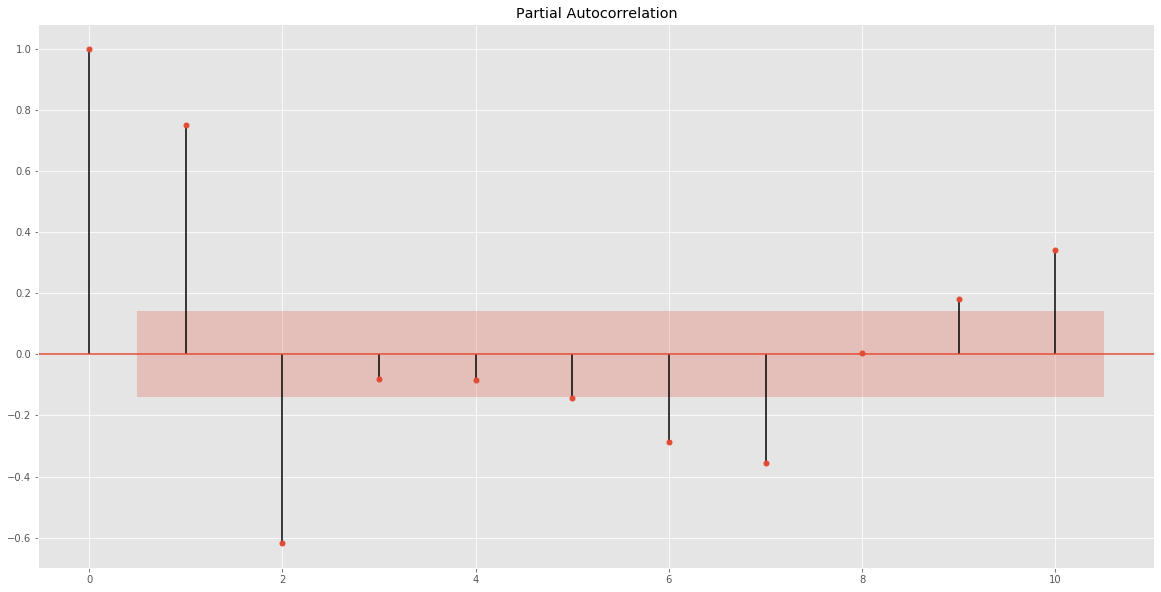

In [56]:
plt.plot(y)
plot_acf(y, lags=10)
plot_pacf(y, lags=10, method='ols')
plt.show()

In [57]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.325471
p-value: 0.617440
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [58]:

df["Diff_Amount"] = df["Amount"].diff()
diff_values = df["Diff_Amount"].values
y = diff_values[~np.isnan(diff_values)]

In [59]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.532035
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [62]:
model = arima.model.ARIMA(y, order=(3,1,3))

model = arima.model.ARIMA(y, order=(3,1,3))

In [63]:
model_fitted = model.fit()
model_fitted.params
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  194
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -825.438
Date:                Thu, 04 Feb 2021   AIC                           1664.876
Time:                        19:50:36   BIC                           1687.715
Sample:                             0   HQIC                          1674.125
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2289      0.071      3.218      0.001       0.089       0.368
ar.L2          0.5840      0.056     10.507      0.000       0.475       0.693
ar.L3         -0.6316      0.057    -11.115      0.000      -0.743      -0.520
ma.L1         -1.0192      1.656     -0.616      0.538      -4.264       2.226
ma.L2         -0.9560      0.069    -13.781      0.000      -1.092      -0.820
ma.L3          0.9779      1.626      0.602      0.547      -2.208       4.164
sigma2       281.7711    463.514      0.608      0.543    -626.700    1190.242
===================================================================================
Ljung-Box (Q):                      322.38   Jarque-Bera (JB):                 9.71
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.39   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
model_fitted.fittedvalues
model_fitted.forecast(steps=2)

array([9.13675378, 9.57519337])

### Auto Arima

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [68]:
airline = pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\airline_passengers.csv',index_col ='Month',parse_dates = True) 

In [69]:
airline.head() 

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [73]:
from pmdarima import auto_arima 

In [74]:
import warnings 
warnings.filterwarnings("ignore") 

In [75]:
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, 
                          start_q = 1,	max_p = 3, max_q = 3, 
                          m = 12, start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True, 
                          error_action ='ignore', 
                          suppress_warnings = True, 
                          information_criterion='aic',
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.78 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.57 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.78 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.45 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.89 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.24 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=6.86 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [76]:
stepwise_fit.summary() 
stepwise_fit.params

<function pmdarima.arima.arima.ARIMA.params(self)>

### Granger Casuality

In [77]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [79]:
t2 = [item + 0.1*np.random.normal() for item in t1]

In [80]:
t1 = t1[3:]
t2 = t2[:-3]

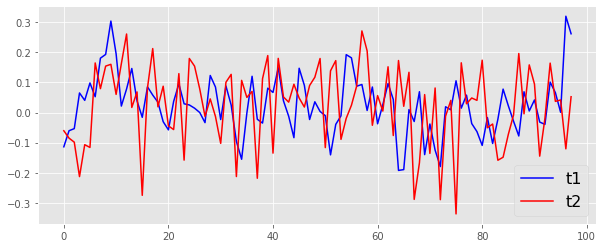

In [81]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [82]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [83]:
ts_df

,t2,t1
0,-0.060484,-0.113864
1,-0.085053,-0.060411
2,-0.098439,-0.053457
3,-0.212921,0.065099
4,-0.106826,0.040549
...,...,...
93,0.164268,0.101176
94,0.037128,0.065902
95,0.041799,0.000760
96,-0.120626,0.320076


In [84]:
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9333  , p=0.0901  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=3.0270  , p=0.0819  , df=1
likelihood ratio test: chi2=2.9807  , p=0.0843  , df=1
parameter F test:         F=2.9333  , p=0.0901  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8020  , p=0.0659  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=5.9118  , p=0.0520  , df=2
likelihood ratio test: chi2=5.7370  , p=0.0568  , df=2
parameter F test:         F=2.8020  , p=0.0659  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.9310 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=64.5492 , p=0.0000  , df=3
likelihood ratio test: chi2=49.2551 , p=0.0000  , df=3
parameter F test:         F=19.9310 , p=0.0000  , df_denom=88, df_num=3
